In [27]:
import matplotlib
#matplotlib.use('Agg')  #this should be uncommented if you are running this in the background on a server
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import os
import pandas as pd
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import pandas as pd
import datetime as dt

sns.set(style="ticks", context="paper")
plt.style.use("dark_background")


In [28]:
yyyymmdd = '20211222'

ds_10s = xr.open_mfdataset('/data/accp/a/snesbitt/scamp/parsivel/nc_daily/'+yyyymmdd+'_*_SCAMP_Parsivel.nc')
#ds_10s = xr.open_mfdataset('/data/accp/a/snesbitt/scamp/parsivel/nc_daily_comb/'+yyyymmdd+'_SCAMP_Parsivel.nc')
ds = ds_10s.resample(time='1MIN').mean()

print(ds)

<xarray.Dataset>
Dimensions:        (diameter: 32, time: 1440, velocity: 32)
Coordinates:
  * time           (time) datetime64[ns] 2021-12-22 ... 2021-12-22T23:59:00
  * diameter       (diameter) float64 0.06 0.19 0.32 0.45 ... 19.57 22.15 25.24
  * velocity       (velocity) float64 0.05 0.15 0.25 0.35 ... 15.2 17.6 20.8
Data variables:
    Nd             (time, diameter) float64 dask.array<chunksize=(1, 32), meta=np.ndarray>
    num_particles  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    dBZ            (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    rr             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    spectrum       (time, velocity, diameter) float64 dask.array<chunksize=(1, 32, 32), meta=np.ndarray>


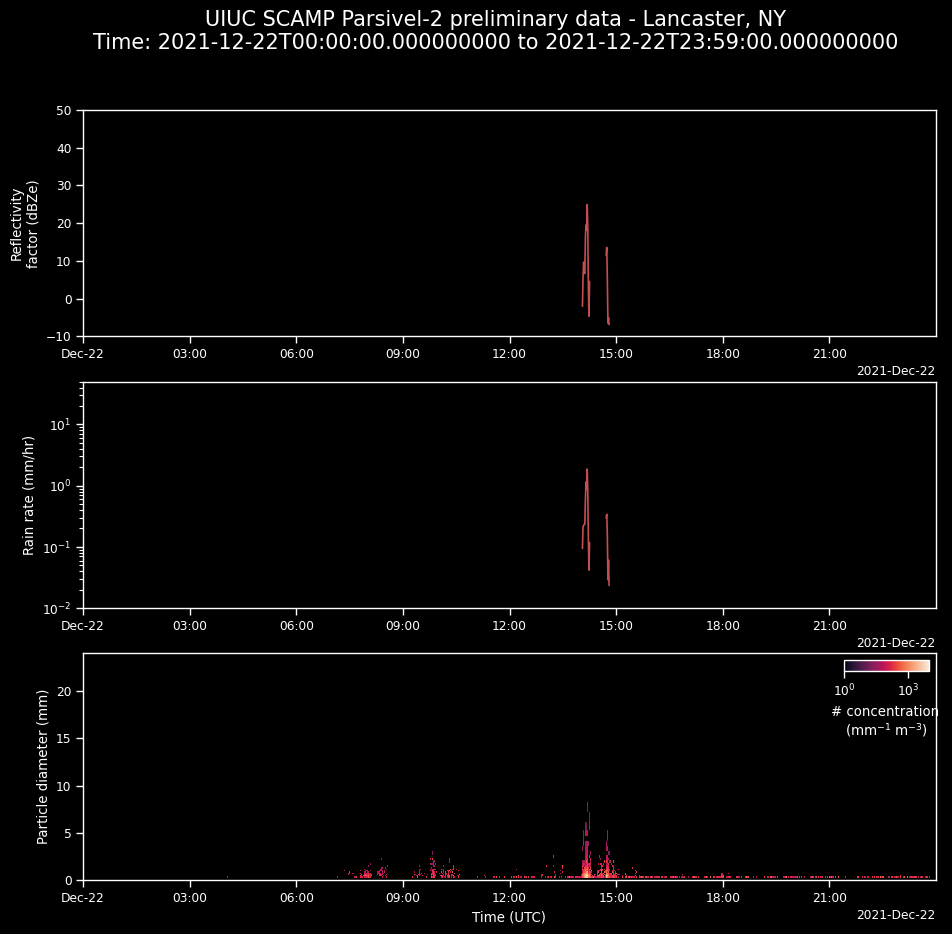

In [29]:
#masking missing values
ds['dBZ'][ds['dBZ'] < -9.9] = np.nan

fig,ax = plt.subplots(nrows = 3,figsize=(11,10))
ax[0].plot(pd.to_datetime(ds.time),ds.dBZ,'r')
ax[0].xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax[1].xaxis.get_major_locator()))
ax[0].set_ylabel('Reflectivity\nfactor (dBZe)', fontsize='medium')

ax[0].set_ylim(-10,50)
ax[0].set_xlim(pd.to_datetime(ds.time.values[0]),pd.to_datetime(ds.time.values[-1]))
ds['rr'][ds['rr'] < .0001] = np.nan
ax[1].plot(pd.to_datetime(ds.time),ds.rr,'r')
ax[1].xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax[1].xaxis.get_major_locator()))
ax[1].set_ylabel('Rain rate (mm/hr)', fontsize='medium')
ax[1].set_yscale("log")
ax[1].set_ylim(.01,50)
ax[1].set_xlim(pd.to_datetime(ds.time.values[0]),pd.to_datetime(ds.time.values[-1]))

from matplotlib.colors import LogNorm
cb=ax[2].pcolormesh(pd.to_datetime(ds.time),ds.diameter,ds.Nd.T,
              norm=LogNorm(vmin=1e-0, vmax=10000))
ax[2].xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax[2].xaxis.get_major_locator()))
cbaxes = inset_axes(ax[2], width="10%", height="5%", loc='upper right') 
plt.colorbar(cb,cax=cbaxes,label='# concentration \n(mm$^{-1}$ m$^{-3}$)',orientation='horizontal')
ax[2].set_ylabel('Particle diameter (mm)', fontsize='medium')
ax[2].set_xlabel('Time (UTC)', fontsize='medium')
ax[2].set_ylim([0,24])
#ax[2].set_facecolor("white")
ax[2].set_xlim(pd.to_datetime(ds.time.values[0]),pd.to_datetime(ds.time.values[-1]))

fig.suptitle('UIUC SCAMP Parsivel-2 preliminary data - Lancaster, NY\nTime: '+str(ds.time.values[0])+' to '+str(ds.time.values[-1]),fontsize=15);

savedimage = '/data/keeling/a/mp46/Research/Saved_Images/Parsivel_BUF_'+yyyymmdd+'_snow.png'
plt.savefig(savedimage,dpi=150)

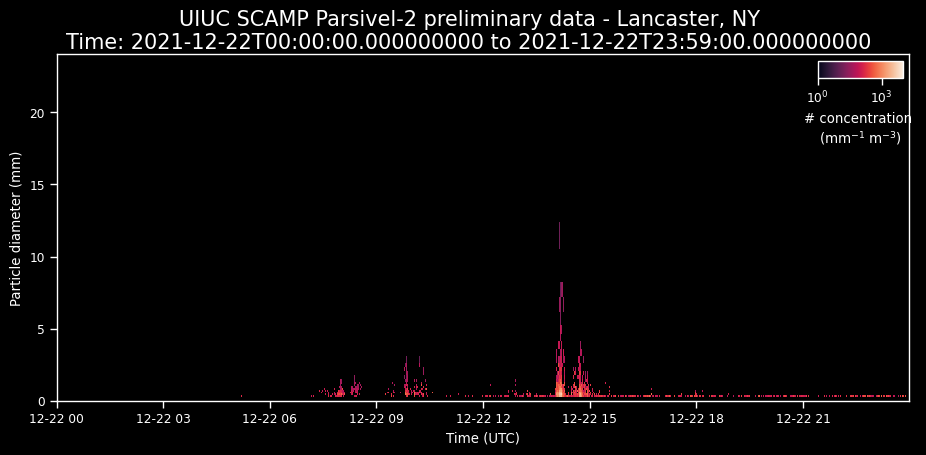

In [30]:
fig,ax = plt.subplots(nrows = 1,figsize=(11,4.5))
from matplotlib.colors import LogNorm
cb=ax.pcolormesh(pd.to_datetime(ds.time),ds.diameter,ds.Nd.T,
              norm=LogNorm(vmin=1e-0, vmax=10000))
#ax.xaxis.set_major_formatter(
#    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
cbaxes = inset_axes(ax, width="10%", height="5%", loc='upper right') 
plt.colorbar(cb,cax=cbaxes,label='# concentration \n(mm$^{-1}$ m$^{-3}$)',orientation='horizontal')
ax.set_ylabel('Particle diameter (mm)', fontsize='medium')
ax.set_xlabel('Time (UTC)', fontsize='medium')
ax.set_ylim([0,24])
#ax[2].set_facecolor("white")
ax.set_xlim(pd.to_datetime(ds.time.values[0]),pd.to_datetime(ds.time.values[-1]))

fig.suptitle('UIUC SCAMP Parsivel-2 preliminary data - Lancaster, NY\nTime: '+str(ds.time.values[0])+' to '+str(ds.time.values[-1]),fontsize=15);


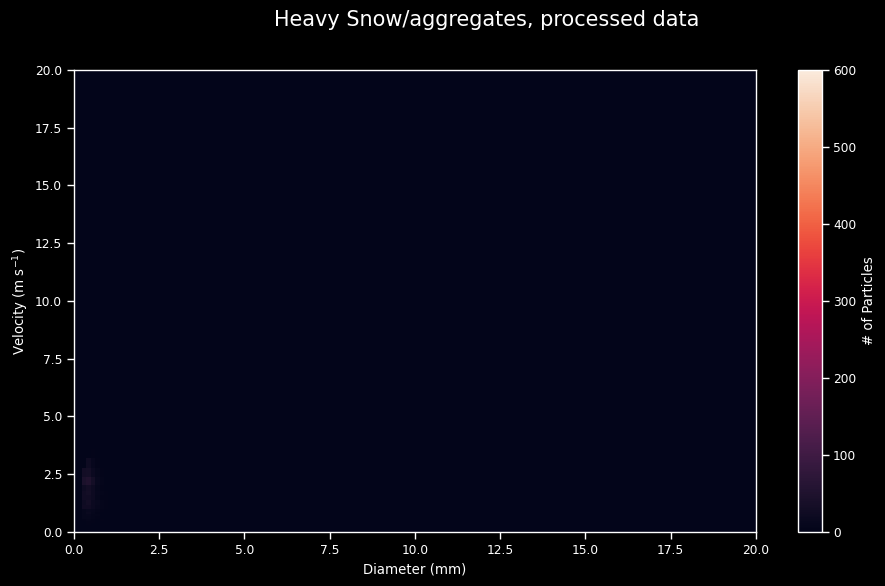

In [31]:
summed_spectrum = ds.spectrum.sum(axis=0)

fig, ax = plt.subplots()
fig.suptitle('Heavy Snow/aggregates, processed data', fontsize=15)
fig.set_size_inches(11,6) #x,y size, default is 8,6
plt.pcolor(ds.diameter,ds.velocity,summed_spectrum,vmin = 0, vmax = 600)#vmax=np.max(dsd_arr))
             
plt.xlabel('Diameter (mm)')
plt.ylabel('Velocity (m s$^{-1}$)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('# of Particles')
ax.set_ylim(0,20)
ax.set_xlim(0,20)
    
plt.show()

In [32]:
fortheview = ds.time

fortheview = 